# Embeddings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from tensorflow import keras
from tensorflow.keras import layers

# Generate Data

In [2]:
N = 10_000
n_tokens = 5
x = np.random.choice(n_tokens, N)
x[:10]

array([3, 4, 3, 1, 1, 3, 0, 0, 3, 3])

In [3]:
token_effect = np.linspace(start=-20, stop=20, num=5)
# reorder the tokens (not necessary but more realistic)
token_effect = np.random.choice(token_effect, n_tokens, replace=False)
token_effect

array([-10.,   0.,  10.,  20., -20.])

In [4]:
y = np.random.normal(token_effect[x], scale=2, size=N)
y[:10]

array([ 21.7850181 , -22.34225123,  21.08655448,   0.7468682 ,
         2.8641797 ,  21.17330013,  -8.35127302,  -9.96790632,
        20.33426255,  18.59267998])

# Embedding Model

Create embedding model.

In [5]:
model = keras.models.Sequential()
model.add(layers.Embedding(input_dim = n_tokens, output_dim = 4, input_length=1))
model.add(layers.Dense(units=10, activation='relu'))
model.add(layers.Dense(units=8, activation='linear'))
model.add(layers.Dense(units=6, activation='linear'))
model.add(layers.Dense(units=4, activation='linear'))
model.add(layers.Dense(units=1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 4)              20        
_________________________________________________________________
dense (Dense)                (None, 1, 10)             50        
_________________________________________________________________
dense_1 (Dense)              (None, 1, 8)              88        
_________________________________________________________________
dense_2 (Dense)              (None, 1, 6)              54        
_________________________________________________________________
dense_3 (Dense)              (None, 1, 4)              28        
_________________________________________________________________
dense_4 (Dense)              (None, 1, 1)              5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
__________________________________________________________

In [6]:
model.compile(optimizer='rmsprop', loss='mse')

Train model.

In [7]:
history = model.fit(x=x, y=y, epochs=100, batch_size=1_000, validation_split=0.2, verbose=0)

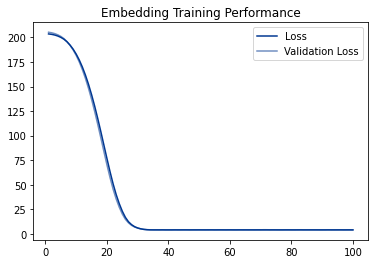

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='#003791', label='Loss')
plt.plot(epochs, val_loss, color='#00379190', label='Validation Loss')
plt.title('Embedding Training Performance')
plt.legend()
plt.savefig('./img/loss.svg', format='svg')
plt.show()


Extract embedding layer.

In [10]:
weights = model.get_weights()
embedding = weights[0]
embedding.shape

(5, 4)

In [11]:
np.round(embedding,2)

array([[-0.03,  0.17, -0.13,  0.09],
       [-0.01,  0.01,  0.  , -0.01],
       [ 0.11, -0.07,  0.12, -0.09],
       [ 0.25, -0.21,  0.3 , -0.28],
       [-0.31,  0.29, -0.26,  0.26]], dtype=float32)

In [12]:
embedding[0,]

array([-0.03208582,  0.16558835, -0.1291961 ,  0.08552495], dtype=float32)

In [13]:
def similarities(target_index, embedding_matrix):
    result = []
    for i in range(0,embedding_matrix.shape[0]):
        s = np.linalg.norm(embedding_matrix[target_index,] - embedding_matrix[i,])
        result.append(s)
    return(np.array(result))

The embedding similiarity maps the token effect. This is useful since we typically don't know the token effect with real data. The similarity score will be closer to 0 (i.e. similar) for a pair of embeddings if their token effect is close to one another. For example, we expect the embedding for the token that maps to a token effect value of 20 to be farther away from the embedding for the token that maps to a token effect value of -20.

In [14]:
token_effect

array([-10.,   0.,  10.,  20., -20.])

In [15]:
similarities(np.argmax(token_effect), embedding)

array([0.7304573 , 0.5255725 , 0.32273838, 0.        , 1.0848211 ],
      dtype=float32)

# Predictive Check

Below we perform a predictive check. We confirm that the prediction

In [16]:
pred = model.predict(x=x)
np.unique(pred)

array([-20.027105  ,  -9.935604  ,   0.16853252,   0.1685327 ,
        10.210527  ,  20.262878  ], dtype=float32)

In [17]:
cols = np.array(['#005073','#107dac','#189ad3','#1ebbd7','#71c7ec'])
x_range = range(0,len(y))

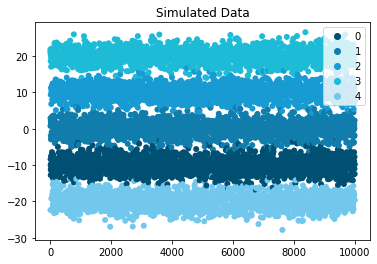

In [18]:
legend_elements = []
for i in range(0, n_tokens):
    legend_elements.append(Line2D([],[], linestyle='none', color=cols[i], markerfacecolor=cols[i], marker='o', label=str(i)))
plt.scatter(x_range, y, color=cols[x], edgecolor='none')
plt.title('Simulated Data')
plt.legend(handles=legend_elements, loc='upper right')
plt.savefig('./img/outcome.svg', format='svg')
plt.show()

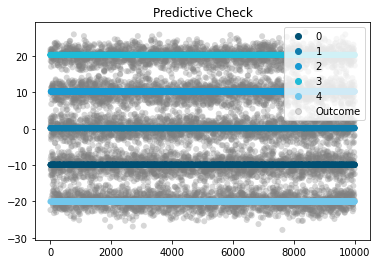

In [19]:
legend_elements.append(Line2D([],[], linestyle='none', color='#80808050', marker='o', label='Outcome'))
plt.scatter(x_range, y, color='#80808050', edgecolor='none')
plt.scatter(x_range, pred, color=cols[x], edgecolor='none')
plt.title('Predictive Check')
plt.legend(handles=legend_elements, loc='upper right')
plt.savefig('./img/pred_check.svg', format='svg')
plt.show()